In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('./daily-total-female-births-CA.csv', index_col=0, header=0)

In [5]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


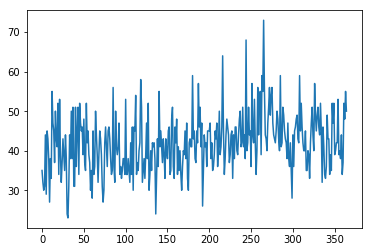

In [7]:
plt.plot(df.values)
plt.show()

In [72]:
def to_supervised(data,n_in,n_out=1):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    agg.dropna(inplace=True)
    return agg.values

In [29]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [58]:
def walk_fw_validation(data, n_test):
    preds = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = forecast(history, testX)
        preds.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    error = mean_absolute_error(test[:, 1], preds)
    return error, test[:, 1], preds

In [52]:
def forecast(history, testX):
    train=np.asarray(history)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict(np.asarray([testX]))
    return yhat[0]

In [73]:
data = to_supervised(df.values, n_in=3)

In [59]:
mae, y, yhat = walk_fw_validation(data, 12)

C:\Users\dell\Anaconda3\envs\nlp_course\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


>expected=42.0, predicted=49.9
>expected=53.0, predicted=42.8
>expected=39.0, predicted=39.3
>expected=40.0, predicted=34.2
>expected=38.0, predicted=43.9
>expected=44.0, predicted=40.5
>expected=34.0, predicted=49.6
>expected=37.0, predicted=37.5
>expected=52.0, predicted=43.6
>expected=48.0, predicted=39.8
>expected=55.0, predicted=43.8
>expected=50.0, predicted=43.2


In [60]:
mae

6.76357905069987

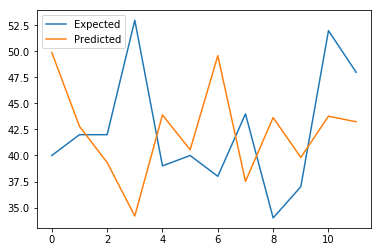

In [61]:
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [75]:
len(data)

362